In [41]:
import numpy as np
import pandas as pd

In [42]:
song_data=pd.read_csv(r'C:\Users\hdmec\Song Data\MillionSongsSubset.csv')

In [43]:
song_data.head()

,SongNumber,SongID,AlbumID,AlbumName,ArtistID,ArtistLatitude,ArtistLocation,ArtistLongitude,ArtistName,Danceability,...,Energy,Key,KeyConfidence,Mode,ModeConfidence,Release,SongHotttness,StartOfFadeOut,Genre,TrackId
0,1,SOBQSLF12A8C139785,296721,The Heart Of Christmas,ARLNSD41187FB4D9A0,42.50382,Italy,12.57347,Sergio Franchi,NaN,...,0.0,8,0.217,1,0.241,The Heart Of Christmas,0.641771,165.581,NaN,TRAGGVT128F428F842
1,2,SOMDTTT12A8C13F1CB,303421,Soul Friends,ARISHTQ1187FB3E6F0,NaN,NaN,NaN,Ben E. King,NaN,...,0.0,10,0.608,1,0.596,Soul Friends,NaN,159.997,classic pop and rock,TRAGGSJ128F42A5AE1
2,3,SOGOJEP12AB018D355,675211,Ghetto Fabolous [Explicit Version],AR3FE581187FB3F90A,NaN,Brooklyn NY,NaN,Fabolous,NaN,...,0.0,1,0.164,1,0.080,Ghetto Fabolous [Explicit Version],NaN,212.869,hip hop rnb and dance hall,TRAGGKN12903CCA8EE
3,4,SOLAZFN12AB018A094,725669,Afro-Indio,AR1N6N61187FB4E25E,23.08330,Havana Cuba [Jesus Maria],-82.41670,Mongo Santamaria,NaN,...,0.0,2,0.579,0,0.696,Afro-Indio,NaN,182.503,NaN,TRAGGXK12903CDA84B
4,5,SOJPZIX12AB018B2BD,769725,Riddim Of Silence,ARJJRZ41187FB4C856,NaN,NaN,NaN,Floor,NaN,...,0.0,0,0.045,1,0.298,Riddim Of Silence,0.266955,202.368,NaN,TRAGGMY12903CD9533


In [44]:
top_20=song_data['Genre'].value_counts().head(20).index[:].tolist()

In [45]:
top_20

['classic pop and rock',
 'hip hop rnb and dance hall',
 'rock and indie',
 'folk',
 'production music',
 'pop and chart',
 'finnish',
 'french',
 'soul and reggae',
 'jazz and blues',
 'german',
 'uk | british | english | classic pop and rock',
 'american',
 'country',
 'world',
 'dance and electronica',
 'classic pop and rock | folk',
 'rock and indie | hip hop',
 'blues',
 'hip hop']

In [46]:
song_data['top_20_genre']=song_data['Genre'].isin(top_20)

In [47]:
song_data.head()

,SongNumber,SongID,AlbumID,AlbumName,ArtistID,ArtistLatitude,ArtistLocation,ArtistLongitude,ArtistName,Danceability,...,Key,KeyConfidence,Mode,ModeConfidence,Release,SongHotttness,StartOfFadeOut,Genre,TrackId,top_20_genre
0,1,SOBQSLF12A8C139785,296721,The Heart Of Christmas,ARLNSD41187FB4D9A0,42.50382,Italy,12.57347,Sergio Franchi,NaN,...,8,0.217,1,0.241,The Heart Of Christmas,0.641771,165.581,NaN,TRAGGVT128F428F842,False
1,2,SOMDTTT12A8C13F1CB,303421,Soul Friends,ARISHTQ1187FB3E6F0,NaN,NaN,NaN,Ben E. King,NaN,...,10,0.608,1,0.596,Soul Friends,NaN,159.997,classic pop and rock,TRAGGSJ128F42A5AE1,True
2,3,SOGOJEP12AB018D355,675211,Ghetto Fabolous [Explicit Version],AR3FE581187FB3F90A,NaN,Brooklyn NY,NaN,Fabolous,NaN,...,1,0.164,1,0.080,Ghetto Fabolous [Explicit Version],NaN,212.869,hip hop rnb and dance hall,TRAGGKN12903CCA8EE,True
3,4,SOLAZFN12AB018A094,725669,Afro-Indio,AR1N6N61187FB4E25E,23.08330,Havana Cuba [Jesus Maria],-82.41670,Mongo Santamaria,NaN,...,2,0.579,0,0.696,Afro-Indio,NaN,182.503,NaN,TRAGGXK12903CDA84B,False
4,5,SOJPZIX12AB018B2BD,769725,Riddim Of Silence,ARJJRZ41187FB4C856,NaN,NaN,NaN,Floor,NaN,...,0,0.045,1,0.298,Riddim Of Silence,0.266955,202.368,NaN,TRAGGMY12903CD9533,False


In [92]:
song_data['ArtistLocation'].isnull().sum()

1084

In [48]:
song_data.dropna(subset=['Genre'], inplace=True)

In [58]:
song_data= song_data.drop('Genre', axis=1)

In [59]:
song_data.head()

,SongNumber,SongID,AlbumID,AlbumName,ArtistID,ArtistLatitude,ArtistLocation,ArtistLongitude,ArtistName,Danceability,...,Energy,Key,KeyConfidence,Mode,ModeConfidence,Release,SongHotttness,StartOfFadeOut,TrackId,top_20_genre
1,2,SOMDTTT12A8C13F1CB,303421,Soul Friends,ARISHTQ1187FB3E6F0,NaN,NaN,NaN,Ben E. King,NaN,...,0.0,10,0.608,1,0.596,Soul Friends,NaN,159.997,TRAGGSJ128F42A5AE1,True
2,3,SOGOJEP12AB018D355,675211,Ghetto Fabolous [Explicit Version],AR3FE581187FB3F90A,NaN,Brooklyn NY,NaN,Fabolous,NaN,...,0.0,1,0.164,1,0.080,Ghetto Fabolous [Explicit Version],NaN,212.869,TRAGGKN12903CCA8EE,True
5,6,SOHZHHE12A8C1360C0,144765,Quod Superius Sicut Inferius,ARF3L8J1187B9B7866,37.97615,Athens Greece,23.73641,Astarte,NaN,...,0.0,4,0.596,0,0.566,Quod Superius Sicut Inferius,0.443291,476.700,TRAGGVS128F4250CE8,False
9,10,SOFAWJJ12AB0180A39,543041,Aitai,ARVFGPJ1187B9A2477,NaN,NaN,NaN,Michelle & Vickie,NaN,...,0.0,10,0.226,0,0.519,Aitai,NaN,182.967,TRAGGQQ128F931D8E1,False
10,11,SOLKBKQ12A8C13400C,87397,LIVE IN CONCERT,ARHT0B11187B993CB3,30.22032,Lafayette LA,-92.01705,Eddy Raven,NaN,...,0.0,5,0.920,1,0.658,LIVE IN CONCERT,NaN,204.852,TRAGGHA128F4262D55,True


In [60]:
from sklearn.model_selection import train_test_split

In [84]:
sd_copy = song_data.copy()

In [85]:
do_not_need=['SongID','AlbumID','ArtistID','ArtistLatitude','ArtistLongitude',
             'Danceability','AlbumName','Release']
sd_copy=sd_copy.drop(do_not_need, axis=1)

In [86]:
sdbase_train,sdbase_test=train_test_split(sd_copy, test_size=0.20, random_state=42)
sdbase_train.shape, sdbase_test.shape

((2968, 25), (742, 25))

In [87]:
sdbase_train, sdbase_val = train_test_split(sdbase_train, test_size = 0.20, random_state=42)
sdbase_train.shape, sdbase_val.shape

((2374, 25), (594, 25))

In [88]:
target = ['top_20_genre']

x_train_base = sdbase_train.drop(target, axis=1)
y_train_base = sdbase_train[target]
x_val_base = sdbase_val.drop(target, axis=1)
y_val_base = sdbase_val[target]
x_test_base = sdbase_test.drop(target, axis=1)
y_test_base = sdbase_test[target]

In [89]:
print(x_train_base.shape, y_train_base.shape)
print(x_val_base.shape, y_val_base.shape)
print(x_test_base.shape, y_test_base.shape)

(2374, 24) (2374, 1)
(594, 24) (594, 1)
(742, 24) (742, 1)


In [95]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

lr_base_model= make_pipeline(ce.OrdinalEncoder(),
                            IterativeImputer(),
                            StandardScaler(),
                            LinearRegression())
lr_base_model.fit(x_train_base, y_train_base)
print('Linear Regression R^2', lr_base_model.score(x_val_base, y_val_base))

Linear Regression R^2 0.023597661328792707


In [97]:
log_base_model= make_pipeline(ce.OrdinalEncoder(),
                            IterativeImputer(),
                            StandardScaler(),
                            LogisticRegression())
log_base_model.fit(x_train_base, y_train_base)
print('Training Accuracy', log_base_model.score(x_train_base, y_train_base))
print('Validation Accuracy', log_base_model.score(x_val_base, y_val_base))

Training Accuracy 0.6950294860994103
Validation Accuracy 0.7239057239057239


C:\Users\hdmec\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [99]:
rf_base_model = make_pipeline(ce.OrdinalEncoder(),
                              IterativeImputer(),
                             RandomForestClassifier(random_state=42))
rf_base_model.fit(x_train_base, y_train_base)
print('Training Accuracy', rf_base_model.score(x_train_base, y_train_base))
print('Validation Accuracy', rf_base_model.score(x_val_base, y_val_base))

C:\Users\hdmec\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Training Accuracy 1.0
Validation Accuracy 0.7272727272727273


In [103]:
import eli5
from eli5.sklearn import PermutationImportance

transformers = make_pipeline(ce.OrdinalEncoder(),
                              IterativeImputer())
x_train_transformed = transformers.fit_transform(x_train_base)
x_val_transformed = transformers.transform(x_val_base)

rf_model = RandomForestClassifier(random_state=42,n_jobs=-1)
rf_model.fit(x_train_transformed,y_train_base)

feature_names = x_val_base.columns.tolist()

permuter = PermutationImportance(
rf_model,
scoring = 'accuracy',
n_iter = 5,
random_state=42)

permuter.fit(x_val_transformed, y_val_base)

eli5.show_weights(
permuter,
top=None,
feature_names=feature_names)

C:\Users\hdmec\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Weight,Feature
0.0152 ± 0.0080,ArtistName
0.0111 ± 0.0101,ArtistFamiliarity
0.0074 ± 0.0046,Year
0.0067 ± 0.0155,Tempo
0.0057 ± 0.0084,Duration
0.0054 ± 0.0132,ArtistHotttnesss
0.0044 ± 0.0097,KeySignature
0.0040 ± 0.0062,EndOfFadeIn
0.0037 ± 0.0039,Loudness
0.0027 ± 0.0089,ModeConfidence


In [105]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob_forest = rf_base_model.predict_proba(x_val_base)[:,-1]
fpr,tpr, thresholds = roc_curve(y_val_base, y_pred_prob_forest)

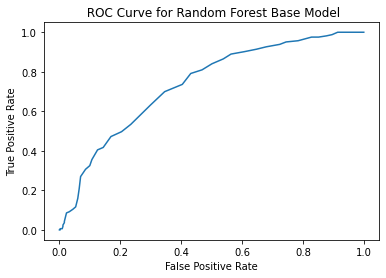

In [106]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr)

plt.title(' ROC Curve for Random Forest Base Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [107]:
song_data

,SongNumber,SongID,AlbumID,AlbumName,ArtistID,ArtistLatitude,ArtistLocation,ArtistLongitude,ArtistName,Danceability,...,Energy,Key,KeyConfidence,Mode,ModeConfidence,Release,SongHotttness,StartOfFadeOut,TrackId,top_20_genre
1,2,SOMDTTT12A8C13F1CB,303421,Soul Friends,ARISHTQ1187FB3E6F0,NaN,NaN,NaN,Ben E. King,NaN,...,0.0,10,0.608,1,0.596,Soul Friends,NaN,159.997,TRAGGSJ128F42A5AE1,True
2,3,SOGOJEP12AB018D355,675211,Ghetto Fabolous [Explicit Version],AR3FE581187FB3F90A,NaN,Brooklyn NY,NaN,Fabolous,NaN,...,0.0,1,0.164,1,0.080,Ghetto Fabolous [Explicit Version],NaN,212.869,TRAGGKN12903CCA8EE,True
5,6,SOHZHHE12A8C1360C0,144765,Quod Superius Sicut Inferius,ARF3L8J1187B9B7866,37.97615,Athens Greece,23.73641,Astarte,NaN,...,0.0,4,0.596,0,0.566,Quod Superius Sicut Inferius,0.443291,476.700,TRAGGVS128F4250CE8,False
9,10,SOFAWJJ12AB0180A39,543041,Aitai,ARVFGPJ1187B9A2477,NaN,NaN,NaN,Michelle & Vickie,NaN,...,0.0,10,0.226,0,0.519,Aitai,NaN,182.967,TRAGGQQ128F931D8E1,False
10,11,SOLKBKQ12A8C13400C,87397,LIVE IN CONCERT,ARHT0B11187B993CB3,30.22032,Lafayette LA,-92.01705,Eddy Raven,NaN,...,0.0,5,0.920,1,0.658,LIVE IN CONCERT,NaN,204.852,TRAGGHA128F4262D55,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9993,SOKJUOW12AB0181545,358013,Trasmazonia,ARK8EHO1187B9B71D1,57.15382,Aberdeen Scotland,-2.10679,Shamen,NaN,...,0.0,4,0.287,0,0.305,Trasmazonia,0.265861,588.121,TRBCTBL128F931FF29,False
9995,9996,SOCHBZX12A8C141F2B,499661,Get the Led Out - Led Zeppelin Salute,ARNPPTH1187B9AD429,51.48550,Heston Middlesex England,-0.37196,Jimmy Page,NaN,...,0.0,2,0.471,0,0.412,Get the Led Out - Led Zeppelin Salute,0.499446,153.037,TRBCTFW128F931FBE9,False
9996,9997,SOOYKEK12A8C13B1DD,299387,The Preacher's Son,ARRJ3UC1187FB579D7,NaN,Croix-des-Bouquets Haiti,NaN,Wyclef Jean featuring Prodigy of Mobb Deep,NaN,...,0.0,2,0.770,1,0.667,The Preacher's Son,0.439202,225.907,TRBCTRX128F4299237,True
9998,9999,SOVXFJX12A81C2387B,230740,LAViSH,ARWJEOP1187B996538,NaN,NaN,NaN,Soul Ballet,NaN,...,0.0,4,0.279,0,0.295,LAViSH,0.609044,453.671,TRBCTKV128F42222BD,False


In [269]:

def wrangle(X):
    
    unnecessary=['SongNumber','SongID','AlbumID','ArtistID','ArtistLatitude','ArtistLongitude','ArtistName',
                 'Danceability','AlbumName','Release','Energy','TrackId','AudioMd5','Title','SongHotttness',
                 'Key', 'KeySignatureConfidence','TimeSignature','Mode','KeyConfidence']
    
    X = X.copy().drop(unnecessary, axis=1)
    
    X.dropna(subset=['ArtistLocation','Year'], inplace=True)
    
    X=X.reset_index().drop('index',axis=1)
    
    return X

train_first = wrangle(song_data)
train_first.shape

(1899, 13)

In [270]:
train_first.head()

,ArtistLocation,Duration,KeySignature,Loudness,Tempo,TimeSignatureConfidence,Year,ArtistFamiliarity,ArtistHotttnesss,EndOfFadeIn,ModeConfidence,StartOfFadeOut,top_20_genre
0,Athens Greece,515.36934,4,-4.694,129.088,0.453,2002.0,0.537088,0.352919,0.427,0.566,476.700,False
1,Lafayette LA,204.85179,5,-11.140,133.428,0.061,1995.0,0.464994,0.344721,0.000,0.658,204.852,True
2,Wilmette IL,203.91138,2,-3.237,140.878,0.930,2007.0,0.937965,0.566623,0.000,0.270,191.216,False
3,London England,204.14649,2,-4.556,114.902,0.000,1978.0,0.822433,0.531303,0.444,0.420,192.830,False
4,Barking Essex England,180.19220,0,-17.810,81.256,1.000,2008.0,0.703691,0.529196,0.000,0.558,169.407,False


In [271]:
train_first.isnull().sum()

ArtistLocation             0
Duration                   0
KeySignature               0
Loudness                   0
Tempo                      0
TimeSignatureConfidence    0
Year                       0
ArtistFamiliarity          0
ArtistHotttnesss           0
EndOfFadeIn                0
ModeConfidence             0
StartOfFadeOut             0
top_20_genre               0
dtype: int64

In [272]:
train_first.apply(pd.Series.nunique)

ArtistLocation              395
Duration                   1733
KeySignature                 12
Loudness                   1780
Tempo                      1878
TimeSignatureConfidence     668
Year                         60
ArtistFamiliarity           684
ArtistHotttnesss            662
EndOfFadeIn                 595
ModeConfidence              664
StartOfFadeOut             1851
top_20_genre                  2
dtype: int64

In [273]:
def train_val_test(X):
    ''' Will split a dataframe into seperate training, validation, and test sets'''
    X=X.copy()
    train,test=train_test_split(X, test_size=0.20, random_state=42)
    train, val = train_test_split(train, test_size = 0.20, random_state=42)
    
    return train, val, test

In [274]:
train, val, test = train_val_test(train_first)

In [275]:
train.shape, val.shape, test.shape

((1215, 13), (304, 13), (380, 13))

In [276]:
train_top1 = train
val_top1 = val
test_top1 = test

In [277]:
target = ['top_20_genre']

x_train_top1 = train_top1.drop(target, axis=1)
y_train_top1 = train_top1[target]
x_val_top1 = val_top1.drop(target, axis=1)
y_val_top1 = val_top1[target]
x_test_top1 = test_top1.drop(target, axis=1)
y_test_top1 = test_top1[target]

In [278]:
x_train_top1.shape, y_train_top1.shape

((1215, 12), (1215, 1))

In [379]:
log_top1_model= make_pipeline(ce.OrdinalEncoder(), 
                              LogisticRegression(max_iter=860,
                                               random_state=42))
log_top1_model.fit(x_train_top1, y_train_top1)
print('Training Accuracy', log_top1_model.score(x_train_top1, y_train_top1))
print('Validation Accuracy', log_top1_model.score(x_val_top1, y_val_top1))

C:\Users\hdmec\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Accuracy 0.6946502057613169
Validation Accuracy 0.7467105263157895


In [279]:
rf_top1_model = make_pipeline(ce.OrdinalEncoder(),
                             RandomForestClassifier(n_estimators =200,
                                                    oob_score=True,
                                                    max_depth=30,
                                                    max_leaf_nodes=40,
                                                    random_state=42,
                                                    warm_start=True,
                                                    n_jobs=-1)
                             )
rf_top1_model.fit(x_train_top1, y_train_top1)
print('Training Accuracy', rf_top1_model.score(x_train_top1, y_train_top1))
print('Validation Accuracy', rf_top1_model.score(x_val_top1, y_val_top1))

C:\Users\hdmec\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Training Accuracy 0.8674897119341564
Validation Accuracy 0.7631578947368421


In [382]:
from sklearn.ensemble import GradientBoostingClassifier

gb_top1_model = make_pipeline(ce.OrdinalEncoder(),
                             GradientBoostingClassifier(n_estimators=90,
                                                        min_samples_split=6,
                                                        min_samples_leaf=2,
                                                        max_depth=3,
                                                        random_state=42))

gb_top1_model.fit(x_train_top1, y_train_top1)
print('Training Accuracy', gb_top1_model.score(x_train_top1, y_train_top1))
print('Validation Accuracy', gb_top1_model.score(x_val_top1, y_val_top1))
print('Test Accuracy', gb_top1_model.score(x_test_top1, y_test_top1))

C:\Users\hdmec\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Accuracy 0.8823045267489712
Validation Accuracy 0.7927631578947368
Test Accuracy 0.7552631578947369


In [381]:
from sklearn.metrics import accuracy_score
y_pred = gb_top1_model.predict(x_test_top1)
test_accuracy = accuracy_score(y_pred, y_test_top1)
print(test_accuracy)

0.7552631578947369


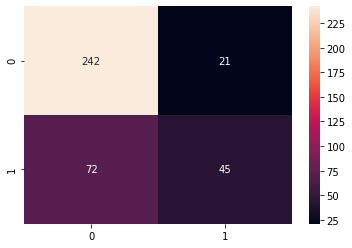

In [395]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = [False,True]
cm = confusion_matrix(y_test_top1, y_pred, labels)

ax=plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g');

plt.show()